# Faktor Apakah yang Menjual Sebuah Mobil?

Anda adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Anda setiap hari. Anda perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

## Pra-pemrosesan

In [1]:
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Memuat Data

In [2]:
# Muat file data menjadi DataFrame
try:
    data = pd.read_csv ('/datasets/vehicles_us.csv')
except:
    data = pd.read_csv ('vehicles_us.csv')

### Mengeksplorasi Data Awal

*Dataset* Anda berisi kolom-kolom berikut: 


- `price` - Harga jual kendaraan tersebut
- `model_year` - Tahun kendaraan diproduksi
- `model` - Merk dan series Kendaraan
- `condition` - Kondisi kendaraan dengan parameter <br>
        - Kendaraan Baru = 5 <br>
        - Kendaraan Seperti Baru = 4 <br>
        - Kendaraan mulus = 3 <br>
        - Kendaraan bagus = 2<br>
        - Kendaraan cukup untuk bisa berjalan = 1<br>
        - kendaraan rusak / mati total = 0<br>
- `cylinders` - Jumlah silinder kendaraan
- `fuel` — Bahan bakar kendaraan
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan 
- `transmission` - Sistem transmisi kendaraan
- `paint_color` - Warna kendaraan
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus

In [3]:
# tampilkan informasi/rangkuman umum tentang DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# tampilkan sampel data
data.tail(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51515,12000,2005.0,chevrolet silverado 2500hd,good,8.0,diesel,228000.0,automatic,pickup,silver,1.0,2018-08-18,52
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51517,11000,2012.0,dodge charger,excellent,8.0,gas,81000.0,automatic,sedan,black,NaN,2019-04-19,44
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,NaN,2018-08-10,63
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


<b> Mini-Conclusion </b>

- `price` is OK
- `model_year`  47906 Rows < 51525, <b> Need to do something </b>
- `model`  is OK
- `condition`  is OK
- `cylinders`  46265 Rows < 51525, <b> Need to do something </b>
- `fuel`  is OK
- `odometer`  43633 Rows < 51525, <b> Need to do something </b>
- `transmission` is OK
- `type` is OK
- `paint_color` 42258 Rows < 51525, <b> Need to do something </b>
- `is_4wd` 25572 Rows < 51525, <b> Need to do something </b>
- `date_posted` is String ('Object') Not Date, <b> Need to do something </b>
- `days_listed` is OK

#### model_year Missing value exploring.

In [5]:
data.model_year.unique()

array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

indentify unique data

In [6]:
data.loc[data['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


Noted :

- There was 3619 rows missing value in model_year
- There's no pattern who related with model_year missing value

In [7]:
null_model_year = data.loc[data['model_year'].isna()]
len(null_model_year) / len(data) * 100

7.023774866569626

- There was 7% missing value on data

#### cylinders Missing value exploring.

In [8]:
data.cylinders.unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

In [9]:
data.cylinders.value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

indentify unique data

In [10]:
data.loc[data['cylinders'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,NaN,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,NaN,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,NaN,2018-06-22,28


Noted :

- There was 5260 rows missing value in cylinders
- There was found pattern or related data with gas fuel.

In [11]:
null_cylinders = data.loc[data['cylinders'].isna()]
len(null_cylinders) / len(data) * 100

10.208636584182436

- There was 10% missing value on data

In [12]:
null_cylinders.fuel.value_counts()

gas         4826
diesel       378
hybrid        39
other         15
electric       2
Name: fuel, dtype: int64

Re-checking related missing value data with fuel columns.

- most of the cylinders missing value is gas fuel. but other fuel are found in missing value dataset.

#### odometer Missing value exploring.

In [13]:
data.odometer.unique()

array([145000.,  88705., 110000., ..., 121778., 181500., 139573.])

indentify unique data

In [14]:
data.loc[data['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


Noted :

- There was 7892 rows missing value in odometer column.
- There was found pattern or related data with gas fuel and automatic transmission

In [15]:
null_odometer = data.loc[data['odometer'].isna()]
len(null_odometer) / len(data) * 100

15.316836487142163

- There was 15,3% missing value on data

In [16]:
null_odometer.fuel.value_counts()

gas         7200
diesel       610
hybrid        58
other         23
electric       1
Name: fuel, dtype: int64

In [17]:
null_odometer.transmission.value_counts()

automatic    7186
manual        426
other         280
Name: transmission, dtype: int64

Re-checking related missing value data between transmission and fuel columns

- most of the odometer missing value is gas fuel. but other fuel are found in missing value dataset.
- most of the odometer missing value is automatic transmission. but other transmission are found in missing value dataset.


#### paint_color Missing value exploring.

In [18]:
data.paint_color.unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [19]:
data.paint_color.value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

Identify unique columns

In [20]:
data.loc[data['paint_color'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,NaN,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,NaN,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


Noted :

- There was 9267 rows missing value in paint_color column.
- There was found pattern or related data with gas fuel and automatic transmission

In [21]:
null_paint_color = data.loc[data['paint_color'].isna()]
len(null_paint_color) / len(data) * 100

17.985443959243085

- There was 17,9% missing value on data

In [22]:
null_paint_color.fuel.value_counts()

gas         8521
diesel       648
hybrid        75
other         21
electric       2
Name: fuel, dtype: int64

In [23]:
null_paint_color.transmission.value_counts()

automatic    8403
manual        514
other         350
Name: transmission, dtype: int64

Re-checking related missing value data between transmission and fuel columns

- most of the paint_color missing value is gas fuel. but other fuel are found in missing value dataset.
- most of the paint_color missing value is automatic transmission. but other transmission are found in missing value dataset.


#### is_4wd Missing value exploring.

In [24]:
data.is_4wd.unique()

array([ 1., nan])

Identify unique columns.

- the option it just 1 its mean vehicle using 4 Wheel Drive system. but there's no option vehicle who not using 4wd system.

In [25]:
data.loc[data['is_4wd'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


Noted :

- There was 25953 rows missing value in paint_color column.
- There was found pattern or related data with gas fuel and automatic transmission

In [26]:
null_is_4wd = data.loc[data['is_4wd'].isna()]
len(null_is_4wd) / len(data) * 100

50.36972343522562

- There was 50,3% missing value on data

In [27]:
null_is_4wd.fuel.value_counts()

gas         24879
diesel        628
hybrid        392
other          50
electric        4
Name: fuel, dtype: int64

In [28]:
null_is_4wd.transmission.value_counts()

automatic    23481
manual        1623
other          849
Name: transmission, dtype: int64

Re-checking related missing value data between transmission and fuel columns

- most of the is_4wd missing value is gas fuel. but other fuel are found in missing value dataset.
- most of the is_4wd missing value is automatic transmission. but other transmission are found in missing value dataset.


### Kesimpulan dan Langkah-Langkah Selanjutnya

1. Missing value.
   in this data was found missing value in the columns:
   - model_year, missing value founded 7% from data
   - cylinders, missing value founded 10% from data
   - odometer, missing value founded 15,3% from data
   - paint_color, missing value founded 17,9% from data
   - is_4wd ,missing value founded 50,3% from data <br>
   
   Compared with other columns, there's no pattern data founded.
   
      
2. Fix and Convert the data to the required types in a date_posted columns.

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

In [29]:
def vehicle_condition(condition):
    if condition == 'new':
        return 5
    if condition == 'like new':
        return 4
    if condition == 'excellent':
        return 3
    if condition == 'good':
        return 2
    if condition == 'fair':
        return 1
    if condition == 'salvage':
        return 0
    
    else:
        return 'not defined'

In [30]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu 
# yang dapat dimanipulasi dengan lebih mudah
data['condition_category'] = data['condition'].apply(vehicle_condition)


In [31]:
#membuat fungsi imputasi dengan pendekatan rata-rata target kolom terhadap kolom kondisi kendaraan
def condition_filter_mean(column_target):
    for rules in data['condition_category'].unique():
        mean = data.loc[(data['condition_category'] == rules) & ~(data[column_target].isna()), column_target].mean()
        data.loc[(data['condition_category'] == rules) & (data[column_target].isna()), column_target] = mean
    return data

lost values will be replace by mean of vehicle condition

In [32]:
#membuat fungsi imputasi dengan pendekatan nilai yang sering muncul di target kolom terhadap kolom kondisi kendaraan
def condition_filter_modus(column_target):
    for rules in data['condition_category'].unique():
        modus = data.loc[(data['condition_category'] == rules) & ~(data[column_target].isna()), column_target].mode()[0]
        data.loc[(data['condition_category'] == rules) & (data[column_target].isna()), column_target] = modus
    return data

lost values will be replace by modus of vehicle condition

###  model_year

In [33]:
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_category
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,4
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,3
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,3
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73,3
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,3
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,3
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,3


In [34]:
data = condition_filter_mean('model_year')

In [35]:
data['model_year'].isna().sum()

0

In [36]:
data['model_year'] = data['model_year'].astype(int)

In [37]:
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_category
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2
1,25500,2008,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,4
3,1500,2003,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,1
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,3
5,14990,2014,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,3
6,12990,2015,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73,3
7,15990,2013,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,3
8,11500,2012,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,3
9,9200,2008,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,3


lost values will be replace by mean of vehicle condition

###  cylinders

In [38]:
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_category
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2
1,25500,2008,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,4
3,1500,2003,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,1
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,3
5,14990,2014,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,3
6,12990,2015,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73,3
7,15990,2013,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,3
8,11500,2012,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,3
9,9200,2008,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,3


In [39]:
data = condition_filter_modus('cylinders')

lost values will be replacy by modus dataset

In [40]:
data['cylinders'].isna().sum()

0

In [41]:
data['cylinders'] = data['cylinders'].astype(int)

In [42]:
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_category
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2
1,25500,2008,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,4
3,1500,2003,ford f-150,fair,8,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,3
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,3
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73,3
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,3
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,3
9,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,3


###  odometer

In [43]:
data = condition_filter_modus('odometer')

In [44]:
data['odometer'].isna().sum()

0

lost values will be replace by modus of dataset

In [45]:
data['odometer'] = data['odometer'].astype(int)

In [46]:
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_category
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,NaN,1.0,2018-06-23,19,2
1,25500,2008,ford f-150,good,6,gas,88705,automatic,pickup,white,1.0,2018-10-19,50,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,NaN,2019-02-07,79,4
3,1500,2003,ford f-150,fair,8,gas,200000,automatic,pickup,NaN,NaN,2019-03-22,9,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,NaN,2019-04-02,28,3
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1.0,2018-06-20,15,3
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,NaN,2018-12-27,73,3
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,1.0,2019-01-07,68,3
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,NaN,1.0,2018-07-16,19,3
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,1.0,2019-02-15,17,3


###  paint_color

In [47]:
data.paint_color.fillna(value='other', inplace=True)
data.paint_color.isna().sum()

0

lost values will be replace by other

###  is_4wd

In [48]:
data.is_4wd.fillna(value=0, inplace=True)
data.is_4wd.isna().sum()

0

In [49]:
data['is_4wd'] = data['is_4wd'].astype(bool)

lost values will be replace by zero cause there's no option beside '1'

## Memperbaiki Tipe Data

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   price               51525 non-null  int64 
 1   model_year          51525 non-null  int64 
 2   model               51525 non-null  object
 3   condition           51525 non-null  object
 4   cylinders           51525 non-null  int64 
 5   fuel                51525 non-null  object
 6   odometer            51525 non-null  int64 
 7   transmission        51525 non-null  object
 8   type                51525 non-null  object
 9   paint_color         51525 non-null  object
 10  is_4wd              51525 non-null  bool  
 11  date_posted         51525 non-null  object
 12  days_listed         51525 non-null  int64 
 13  condition_category  51525 non-null  int64 
dtypes: bool(1), int64(6), object(7)
memory usage: 5.2+ MB


In [51]:
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')

## Memperbaiki Kualitas Data

[Berikan faktor tambahan pada data agar lebih mudah dianalisis.]

In [52]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan
data['year_posted'] = data['date_posted'].dt.year
data['month_posted'] = data['date_posted'].dt.month
data['day_posted'] = data['date_posted'].dt.dayofweek

In [53]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_category,year_posted,month_posted,day_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,other,True,2018-06-23,19,2,2018,6,5
1,25500,2008,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2,2018,10,4
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,4,2019,2,3
3,1500,2003,ford f-150,fair,8,gas,200000,automatic,pickup,other,False,2019-03-22,9,1,2019,3,4
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,3,2019,4,1


In [54]:
data['age_of_vehicle_at_posted'] = (data['year_posted'] - data['model_year']) + 1

In [55]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun
data['yearly_distance'] = data['odometer'] / data['age_of_vehicle_at_posted']

In [56]:
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_category,year_posted,month_posted,day_posted,age_of_vehicle_at_posted,yearly_distance
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,other,True,2018-06-23,19,2,2018,6,5,8,18125.000000
1,25500,2008,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2,2018,10,4,11,8064.090909
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,4,2019,2,3,7,15714.285714
3,1500,2003,ford f-150,fair,8,gas,200000,automatic,pickup,other,False,2019-03-22,9,1,2019,3,4,17,11764.705882
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,3,2019,4,1,3,26967.666667
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,3,2018,6,2,5,11590.800000
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,3,2018,12,3,4,19803.000000
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,3,2019,1,0,7,15639.000000
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,other,True,2018-07-16,19,3,2018,7,0,7,14882.000000
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,3,2019,2,4,12,12265.916667


In [57]:
def merk(value):
    for word in value.split():
        if 'bmw' in word:
            return 'bmw'
        if 'ford' in word:
            return 'ford'
        if 'hyundai' in word:
            return 'hyundai'
        if 'chrysler' in word:
            return 'chrysler'
        if 'toyota' in word:
            return 'toyota'
        if 'honda' in word:
            return 'honda'
        if 'kia' in word:
            return 'kia'
        if 'chevrolet' in word:
            return 'chevrolet'
        if 'jeep' in word:
            return 'jeep'
        if 'nissan' in word:
            return 'nissan'
        if 'subaru' in word:
            return 'subaru'
        if 'dodge' in word:
            return 'dodge'
        if 'mercedes-benz' in word:
            return 'mercedes-benz'
        if 'gmc' in word:
            return 'gmc'
        if 'cadillac' in word:
            return 'cadillac'
        if 'volkswagen' in word:
            return 'volkswagen'
        if 'buick' in word:
            return 'buick'
        if 'ram' in word:
            return 'ram'
        else:
            return 'undefined'

In [58]:
data['brand'] = data['model'].apply(merk)

## Memeriksa Data yang Sudah Bersih

In [59]:
# tampilkan informasi/rangkuman umum tentang DataFrame
data.describe()

,price,model_year,cylinders,odometer,days_listed,condition_category,year_posted,month_posted,day_posted,age_of_vehicle_at_posted,yearly_distance
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.704163,6.177079,108917.463794,39.55476,2.637535,2018.307462,6.628491,3.005434,9.603299,14347.097283
std,10040.803015,6.082015,1.632381,66290.602376,28.20427,0.712447,0.461447,3.474134,1.997759,6.096002,11768.230872
min,1.000000,1908.000000,3.000000,0.000000,0.00000,0.000000,2018.000000,1.000000,0.000000,1.000000,0.000000
25%,5000.000000,2007.000000,4.000000,64110.000000,19.00000,2.000000,2018.000000,3.000000,1.000000,5.000000,8571.428571
50%,9000.000000,2010.000000,6.000000,113333.000000,33.00000,3.000000,2018.000000,7.000000,3.000000,9.000000,12666.444444
75%,16839.000000,2014.000000,8.000000,147821.000000,53.00000,3.000000,2019.000000,10.000000,5.000000,13.000000,17600.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,5.000000,2019.000000,12.000000,6.000000,111.000000,373200.000000


In [60]:
# tampilkan sampel data
data.query("age_of_vehicle_at_posted == 110")

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_category,year_posted,month_posted,day_posted,age_of_vehicle_at_posted,yearly_distance,brand


## Mempelajari Parameter Inti

<AxesSubplot:>

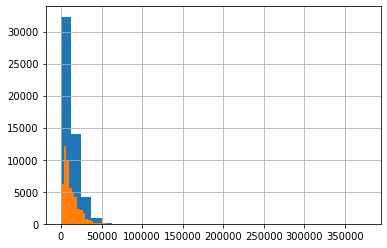

In [61]:
data['price'].hist(bins=30)
data['price'].hist(bins=30, range=(0,100000))

Persebaran data pada kolom price cukup jauh sehingga terlihat jelas outlier pada data tersebut.

<AxesSubplot:>

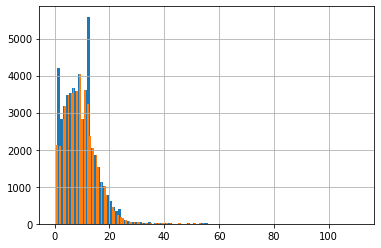

In [62]:
data['age_of_vehicle_at_posted'].hist(bins=100)
data['age_of_vehicle_at_posted'].hist(bins=100, range=(0,60))

persebaran data pada kolom usia kendaraan cukup jauh, sehingga terlihat outlier pada data tersebut.

<AxesSubplot:>

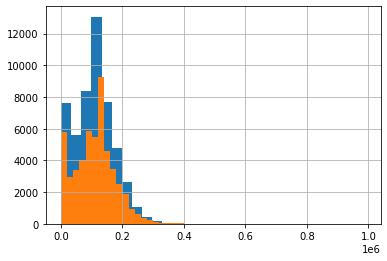

In [63]:
data['odometer'].hist(bins=30)
data['odometer'].hist(bins=30, range=(0,600000))

persebaran data pada kolom jarak tempuh cukup jauh, sehingga terlihat outlier pada data tersebut.

<AxesSubplot:>

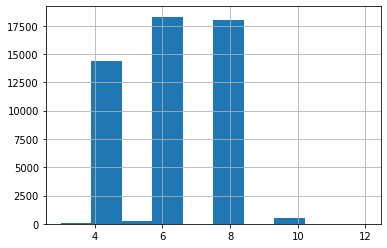

In [64]:
data['cylinders'].hist()

persebaran data pada kolom jumlah silinder kendaraan terbilang cukup normal

<AxesSubplot:>

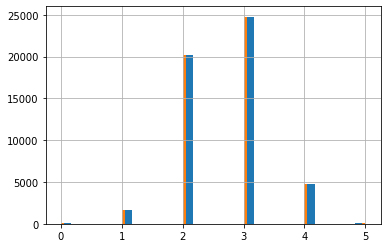

In [65]:
data['condition_category'].hist(bins=30)
data['condition_category'].hist(bins=100)

persebaran data pada kolom jumlah kondisi kendaraan terbilang cukup normal

## Mempelajari dan Menangani Outlier

Terdapat 3 kategory kolom yang terdapat nilai outlier, yaitu :
1. Harga kendaraan. <br>
beberapa iklan memiliki harga kendaraan yang lebih tinggi dari harga umumnya.
2. jarak tempuh kendaraan.  <br>
Beberapa iklan menampilkan jarak tempuk kendaraaan yang cukup jauh dari jarak tempuh kendaraan pada umumnya,
3. Usia kendaraan.  <br>
Beberapa iklan menampilkan usia kendaraan yang dijual jauh dari usia umum kendaraan, sehingga nilai outlier ini perlu di iris.


In [66]:
# Memotong outlier pada kolom harga
# Menggunakan metode quartile
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3-Q1

In [67]:
# Tentukan batas bawah outlier
outlier_lower_bound = Q1 - (1.5*IQR)
print('Batas bawah:', outlier_lower_bound)

Batas bawah: -12758.5


In [68]:
# Tentukan batas atas outlier
outlier_upper_bound = Q3 + (1.5*IQR)
print('Batas atas:', outlier_upper_bound)

Batas atas: 34597.5


In [69]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
data_without_outlier_price = data.query("price > @outlier_lower_bound and price < @outlier_upper_bound")

In [70]:
print('row yang telah dihapus (%):', (len(data) - len(data_without_outlier_price)) / len(data) * 100)

row yang telah dihapus (%): 3.194565744784086


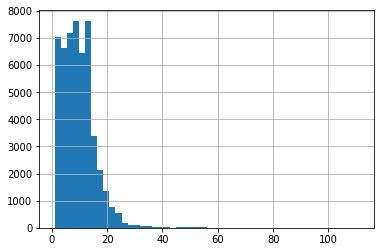

In [71]:
#Memotong outlier pada kolom usia kendaraan
data['age_of_vehicle_at_posted'].hist(bins=50)
data_without_outlier_age = data_without_outlier_price.query('age_of_vehicle_at_posted <= 25')

In [72]:
print('row yang telah dihapus (%):', (len(data) - len(data_without_outlier_age)) / len(data) * 100)

row yang telah dihapus (%): 4.560892770499757


Batas atas odometer : 273387.5


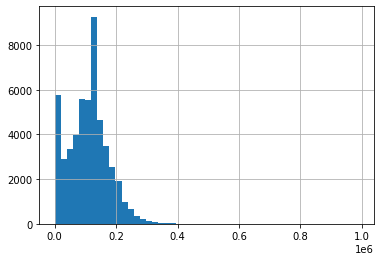

In [73]:
# Memotong outlier pada kolom usia kendaraan
data['odometer'].hist(bins=50)
outlier_odometer = data['odometer'].quantile(0.75) + ((data['odometer'].quantile(0.75) - data['odometer'].quantile(0.25))*1.5)
print('Batas atas odometer :', outlier_odometer)

data_without_outlier_final = data_without_outlier_age.query("odometer < @outlier_odometer")

In [74]:
print('row yang telah dihapus (%):', (len(data) - len(data_without_outlier_final)) / len(data) * 100)

row yang telah dihapus (%): 5.7137311984473556


## Mempelajari Parameter Inti Tanpa Outlier

[Gunakan data yang telah difilter untuk membuat grafik baru. Bandingkan dengan data sebelumnya (yang berisi *outlier*). Tarik kesimpulan masing-masing.]

<AxesSubplot:>

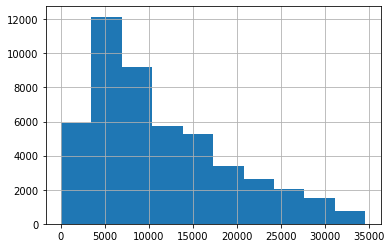

In [75]:
data_without_outlier_final['price'].hist()

<AxesSubplot:>

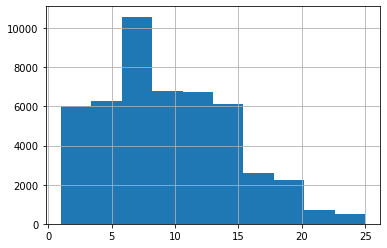

In [76]:
data_without_outlier_final['age_of_vehicle_at_posted'].hist()

<AxesSubplot:>

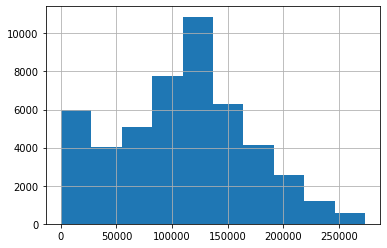

In [77]:
data_without_outlier_final['odometer'].hist()

## Masa Berlaku Iklan

In [78]:
print('Average days listed:', data_without_outlier_final['days_listed'].mean())
print('Median days listed:', data_without_outlier_final['days_listed'].median())
print('Minimum days listed:', data_without_outlier_final['days_listed'].min())
print('maximum days listed:', data_without_outlier_final['days_listed'].max())

Average days listed: 39.53907906383154
Median days listed: 33.0
Minimum days listed: 0
maximum days listed: 271


In [79]:
print('Median iklan yang cepat terhapus :', data_without_outlier_final.query('0 < days_listed <= 33')['days_listed'].median())
print('rata-rata iklan yang cepat terhapus:',data_without_outlier_final.query('0 < days_listed <= 33')['days_listed'].mean())

Median iklan yang cepat terhapus : 19.0
rata-rata iklan yang cepat terhapus: 18.793676728891793


In [80]:
print('Median iklan yang lama terhapus :', data_without_outlier_final.query('days_listed > 33')['days_listed'].median())
print('rata-rata iklan yang lama terhapus:',data_without_outlier_final.query('days_listed > 33')['days_listed'].mean())

Median iklan yang lama terhapus : 54.0
rata-rata iklan yang lama terhapus: 60.73593613571161


Berdasarkan kondisi kendaraan.
- pada umumnya sebuah iklan ditayangkan yaitu 0 - 271 hari. <br>
- Iklan dapat terhapus dengan cepat rata-rata dengan waktu 19 hari dan terlama dengan rata-rata 60 hari

## Harga Rata-Rata Setiap Jenis Kendaraan

In [81]:
price_average = data_without_outlier_final.pivot_table(index='type', values='price', aggfunc=['mean', 'count'])
price_average.columns = ['mean', 'count']
price_average = price_average.reset_index()

<AxesSubplot:xlabel='type'>

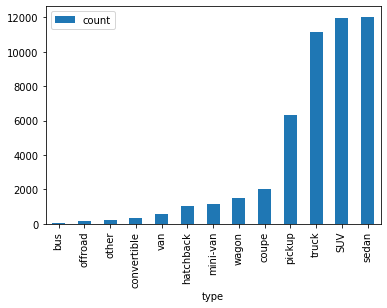

In [82]:
price_average.sort_values(by='count').plot(kind='bar', x='type', y='count')

<AxesSubplot:xlabel='type'>

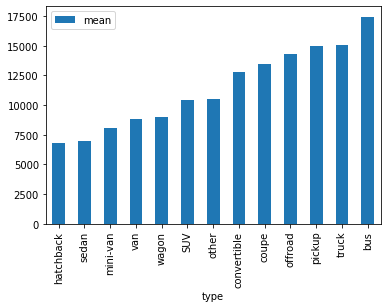

In [83]:
price_average.sort_values(by='mean').plot(kind='bar', x='type', y='mean')

Harga rata-rata tertinggi terdapat pada type Bus dan Truck <br>
sedangkan untuk iklan terbanyak terdapat pada type Sedan dan SUV

## Faktor Harga

Text(0, 0.5, 'Price')

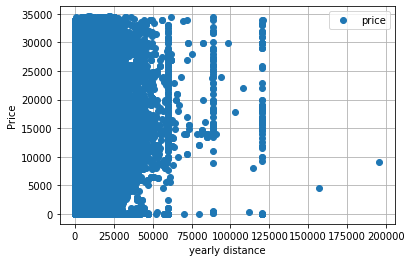

In [84]:
data_without_outlier_final.plot(x='yearly_distance', y='price', style='o', grid=True, legend=True)
plt.xlabel('yearly distance')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

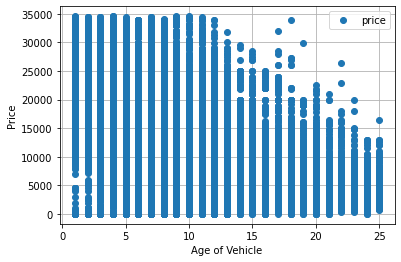

In [85]:
data_without_outlier_final.plot(x='age_of_vehicle_at_posted', y='price', style='o', grid=True, legend=True)
plt.xlabel('Age of Vehicle')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

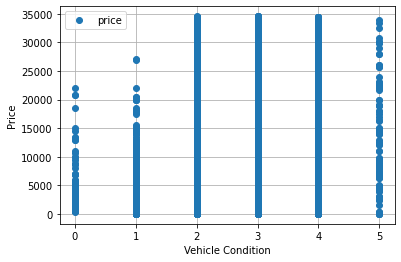

In [86]:
data_without_outlier_final.plot(x='condition_category', y='price', style='o', grid=True, legend=True)
plt.xlabel('Vehicle Condition')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

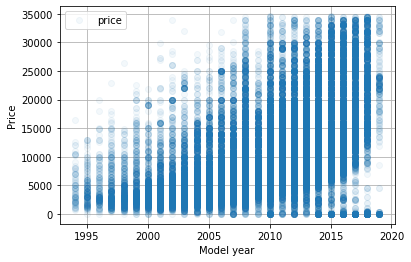

In [87]:
data_without_outlier_final.plot(x='model_year', y='price', style='o', grid=True, legend=True, alpha=0.05)
plt.xlabel('Model year')
plt.ylabel('Price')

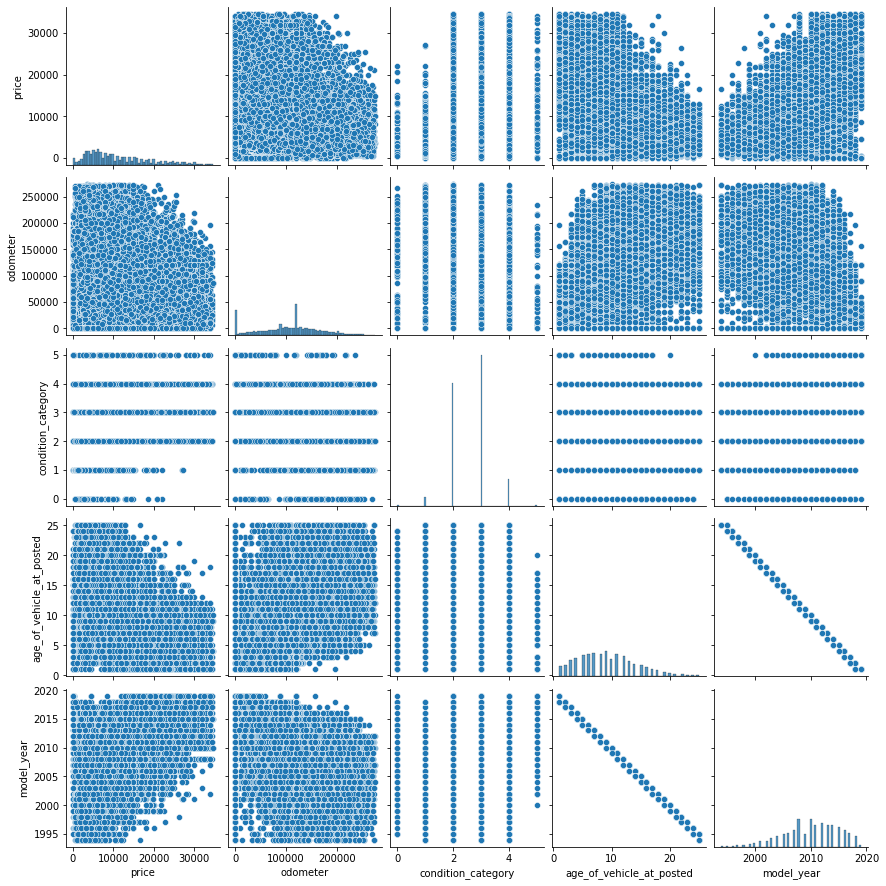

In [88]:
sns.pairplot(data=data_without_outlier_final[['price', 'odometer', 'condition_category', 'age_of_vehicle_at_posted', 'model_year']])

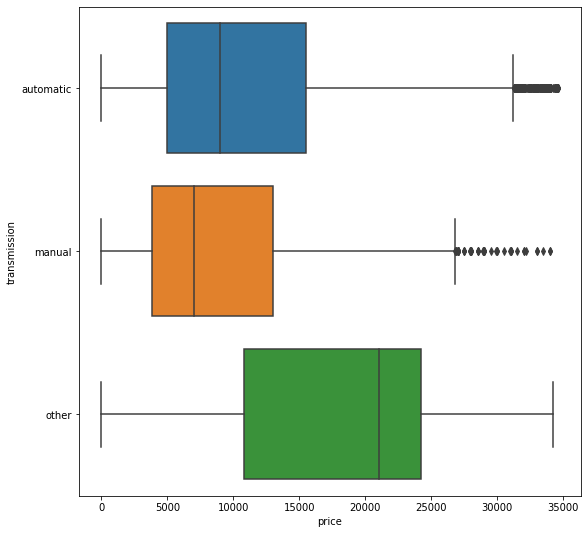

In [89]:
plt.figure(figsize=(9, 9))
sns.boxplot(data=data_without_outlier_final, x='price', y='transmission')
plt.show()

In [90]:
data_without_outlier_final.transmission.value_counts()

automatic    44356
manual        2476
other         1749
Name: transmission, dtype: int64

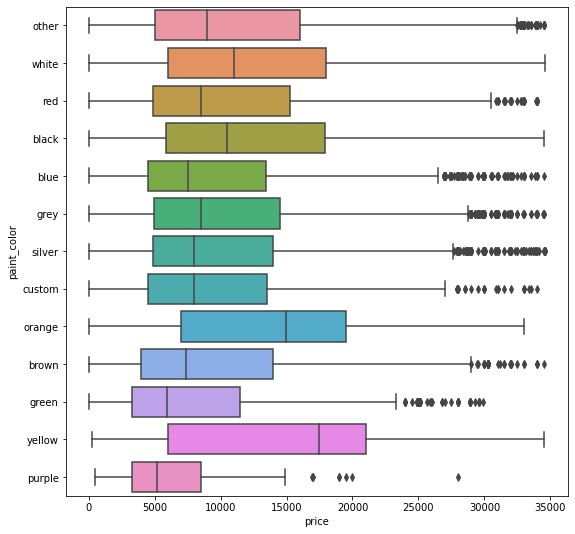

In [91]:
plt.figure(figsize=(9, 9))
sns.boxplot(data=data_without_outlier_final, x='price', y='paint_color')
plt.show()

In [92]:
data_without_outlier_final.paint_color.value_counts()

white     9272
other     8744
black     7211
silver    6054
grey      4826
blue      4255
red       4117
green     1325
brown     1142
custom    1103
yellow     227
orange     213
purple      92
Name: paint_color, dtype: int64

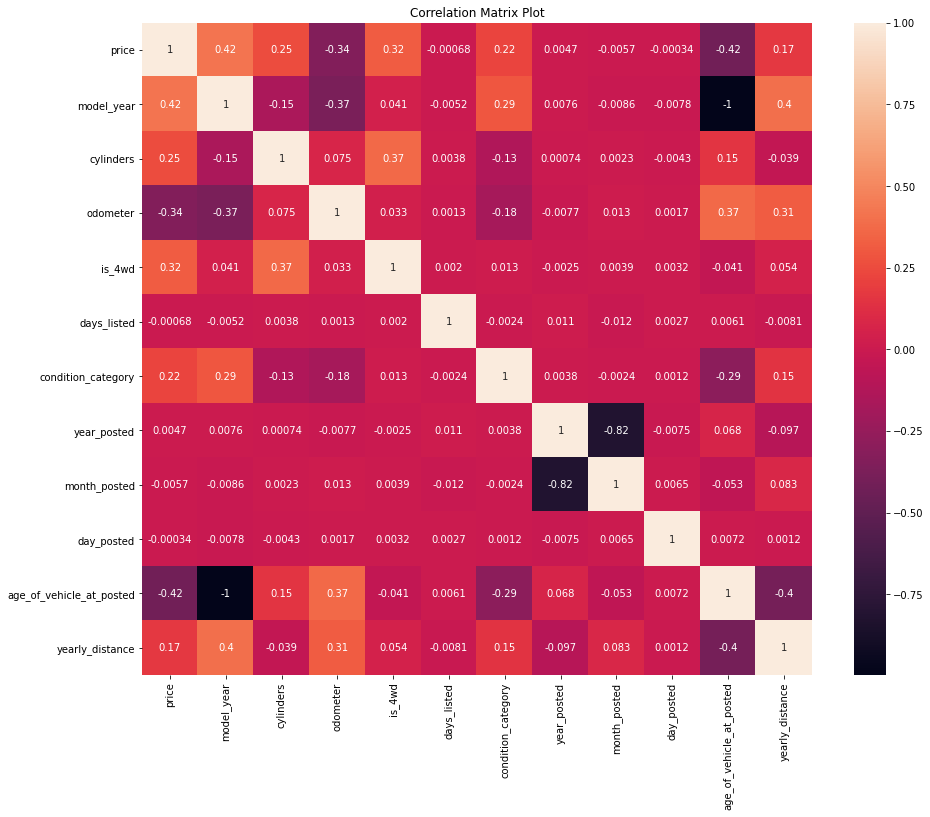

In [93]:
data_without_outlier_final.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Matrix Plot')
plt.show()

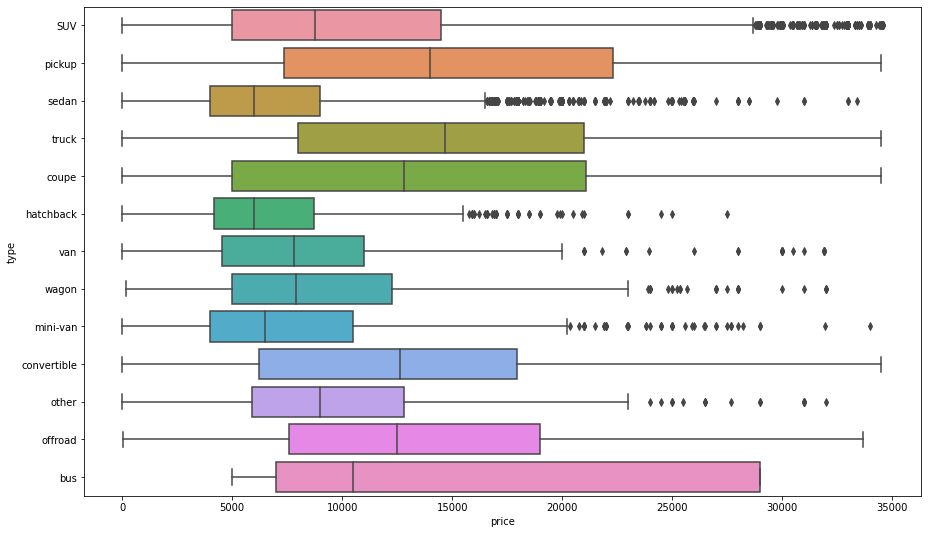

In [94]:
plt.figure(figsize=(15,9))
sns.boxplot(data=data_without_outlier_final, x='price', y='type')
plt.show()

persebaran data pada Type kendaraan berdasarkan harga menunjukan.
- Type Sedan dan hatchback memiliki median harga terkecil, walaupun type sedang memiliki jumlah iklan terbanyak.
- Type SUV memiliki jumlah iklan terbanyak dan persebaran data yang jauh, yang bahkan beberapa kendaraan memiliki harga yang tinggi.
- Type Bus memiliki rentang harga yang paling tinggi diantara type lainnya.

Harga berkolerasi sedang positif dengan kolom model_year dan <br>
Harga berkolerasi sedang negatif dengan usia kendaraan

## Kesimpulan Umum

- Faktor yang mempengaruhi harga mobil yang dijual yaitu :


1. Harga berkolerasi sedang positif dengan kolom model_year dan <br>
Harga berkolerasi sedang negatif dengan usia kendaraan.

Sehingga rata-rata Model terbaru memiliki harga yang lebih tinggi,
sedangkan untuk usia kendaraan tidak berpengaruh terhadap harga kendaraan yang dijual.

2. Harga rata-rata tertinggi terdapat pada type Bus dan Truck <br>
sedangkan untuk iklan terbanyak terdapat pada type Sedan dan SUV
    - Type Sedan memiliki median harga terkecil, walaupun type sedan memiliki jumlah iklan terbanyak.
    - Type SUV memiliki jumlah iklan terbanyak dan persebaran data yang jauh, yang bahkan beberapa kendaraan memiliki harga yang tinggi.
    - Type Bus memiliki rentang harga yang paling tinggi diantara type lainnya.

Sehingga Type Kendaraan juga mempengaruhi nilai/harga kendaraan.



